In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from os import path

In [15]:
processed = path.join("..","data","processed_data")
# data = pd.read_csv("../iModulons/input_csv/compare_iModulones_updated_final.csv", sep=",")
data = pd.read_csv(path.join(processed,"bubble_plot_input.csv"),index_col=0)
data.head()

,iModulon_name,regulator,pvalue,qvalue,recall,precision,f1score,TP,regulon_size,imodulon_size,Exp_variance,Function,Operon,colors,updated_size
iModulon_number,,,,,,,,,,,,,,,
1,DhcR,DhcR,6.94E-10,1.160000e-05,1.000000,0.500000,0.666667,3.0,3.0,6.0,0.26,Amino acid transport and metabolism,atoDABE,#D9A06A,30
3,EatR,EatR,1.25E-13,1.050000e-09,1.000000,0.800000,0.888889,4.0,4.0,5.0,0.19,Amino acid transport and metabolism,PA4022-eat-eutBC,#D9A06A,25
6,ArgR-1,ArgR/Sigma factor X,1.60E-47,2.690000e-43,0.913043,0.583333,0.711864,21.0,23.0,36.0,0.31,Amino acid transport and metabolism,"aruBCDEFG,arcBD, atoJQMP",#D9A06A,180
8,EutR,EutR,4.70E-16,7.880000e-12,1.000000,0.714286,0.833333,5.0,5.0,7.0,0.29,Amino acid transport and metabolism,PA5506-PA5510 (eutBAT),#D9A06A,35
14,ErbR-1,LldR/ErbR,4.78E-14,8.010000e-10,0.533333,0.181818,0.271186,8.0,15.0,44.0,0.59,Amino acid transport and metabolism,pqqABCDEH,#D9A06A,220


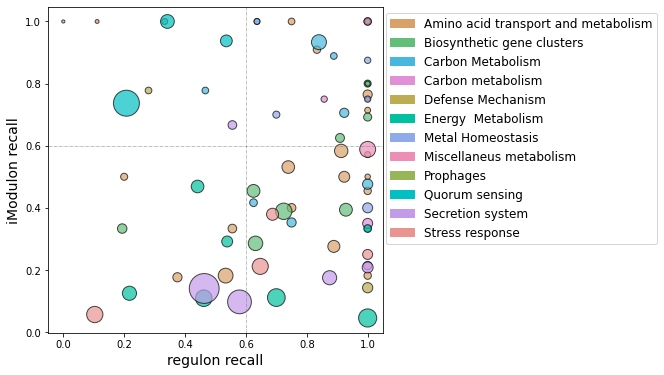

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

#labels=['Amino acid metabolism', 'Antibiotics resistance', 'Biofilm', 'Carbon metabolism', 'Inorganic ion metabolism', 'Lipid metabolism', 'Motility', 'Nitrogen metabolism', 'Others', 'Quorum sensing', 'Secondary metabolites', 'Sulphur Metabolism']
color = dict(zip(data.Function.unique(),['#D9A06A', '#63be79', '#46B8DE', '#E190D6', '#BDAC51',
                                         '#00C19F', '#8FAAEB', '#ED8EB7', '#97B658', '#00C0C3',
                                         '#C29BE9', '#E99491']))

scatter = ax.scatter(data.recall, data.precision,  s=data.updated_size, 
                     c=data.colors,  alpha=0.7, edgecolors='black',)

col_legend = []
for i in color:
    col_legend.append(mpatches.Patch(color=color[i], label=i))

plt.legend( handles=col_legend,bbox_to_anchor=(0.99,1.0), fontsize=12)

#plt.grid(True)
plt.xlabel("regulon recall", size=14)
plt.ylabel("iModulon recall", size=14)
ynew = 0.6
ax.axhline(ynew, linestyle="-.", color='gray', linewidth=0.5)
xnew = 0.6
ax.axvline(xnew, linestyle="-.", color='gray', linewidth=0.5)